In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


In [2]:
plt.rcParams.update({
    "axes.labelsize":22,
    "axes.titlesize": 22,
    "xtick.labelsize":18,
    "ytick.labelsize":18,
    "legend.fontsize":18,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

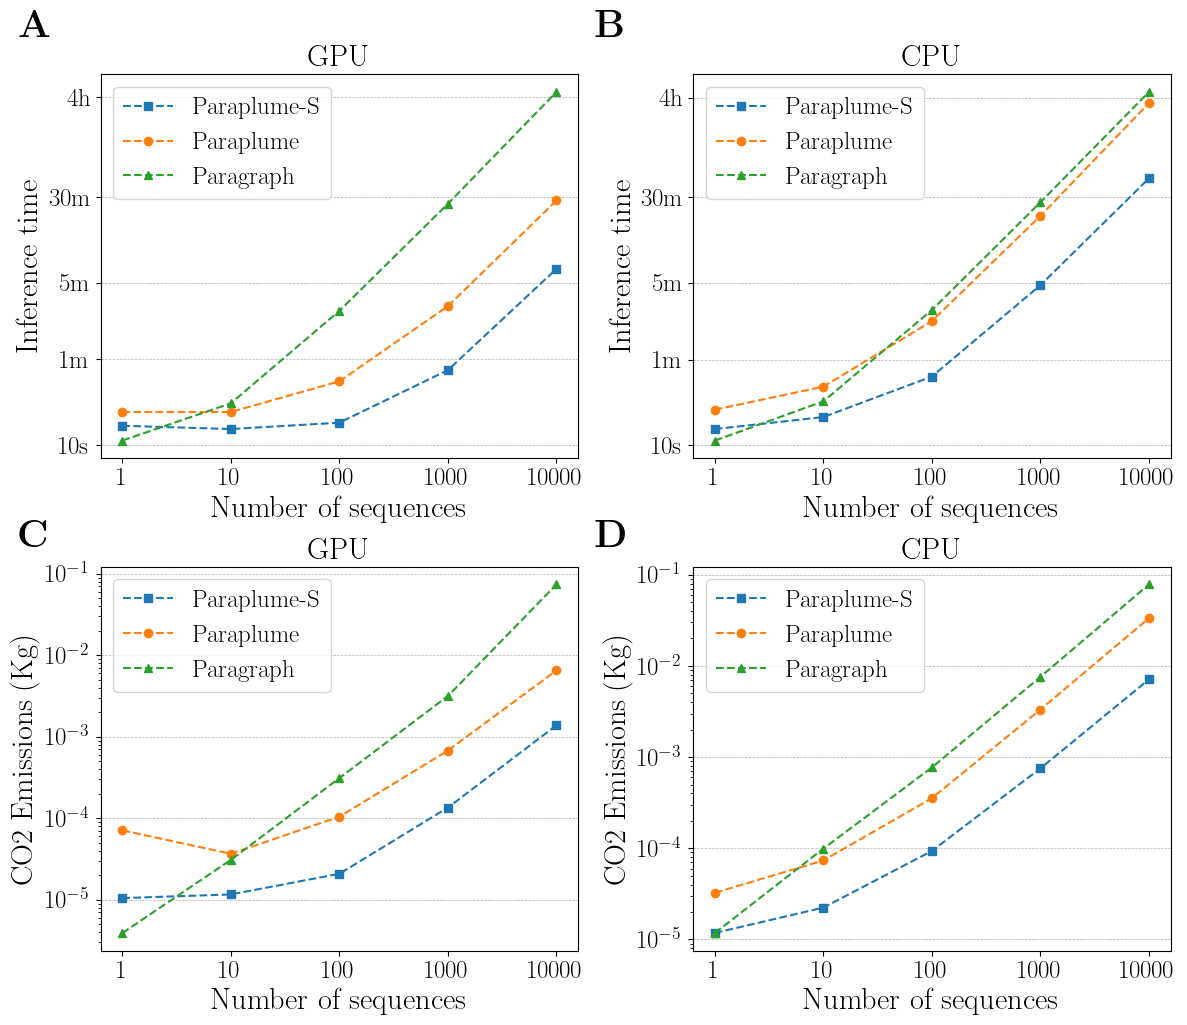

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Function to convert seconds to a label
def seconds_to_label(seconds):
    if seconds < 60:
        return f"{int(seconds)}s"
    elif seconds < 3600:
        return f"{int(seconds // 60)}m"
    else:
        return f"{int(seconds // 3600)}h"

# Inference time GPU
df_gpu_time = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/speed_gpu.txt')
df_gpu_time['TimeTaken(s)'] = df_gpu_time['TimeTaken(s)'].astype(float)
df_gpu_time['ModelType'] = df_gpu_time['ModelType'].replace('ABB3', 'Paragraph')
df_gpu_time['ModelType'] = df_gpu_time['ModelType'].replace('Small', 'Paraplume-S')
df_gpu_time['ModelType'] = df_gpu_time['ModelType'].replace('Large', 'Paraplume')

# Define a marker style for each model
model_markers = {
    "Paraplume": "o",
    "Paraplume-S": "s",
    "Paragraph": "^",
}

for model in df_gpu_time['ModelType'].unique():
    subset = df_gpu_time[df_gpu_time['ModelType'] == model]
    axs[0, 0].plot(subset['Size'], subset['TimeTaken(s)'], marker=model_markers.get(model, 'x'), label=model, linestyle="--")

axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Number of sequences')
axs[0, 0].set_ylabel('Inference time')

y_ticks = [10, 60, 300, 1800, 14400]
axs[0, 0].set_yticks(y_ticks)
axs[0, 0].set_yticklabels([seconds_to_label(s) for s in y_ticks])
axs[0, 0].yaxis.set_minor_locator(ticker.NullLocator())
axs[0, 0].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

x_ticks = [1, 10, 100, 1000, 10000]
axs[0, 0].set_xticks(x_ticks)
axs[0, 0].set_xticklabels([str(x) for x in x_ticks])
axs[0, 0].xaxis.set_minor_locator(ticker.NullLocator())

axs[0, 0].legend()
axs[0, 0].set_title("GPU")

# Inference time CPU
df_cpu_time = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/speed_cpu.txt')
df_cpu_time['TimeTaken(s)'] = df_cpu_time['TimeTaken(s)'].astype(float)
df_cpu_time['ModelType'] = df_cpu_time['ModelType'].replace('ABB3', 'Paragraph')
df_cpu_time['ModelType'] = df_cpu_time['ModelType'].replace('Small', 'Paraplume-S')
df_cpu_time['ModelType'] = df_cpu_time['ModelType'].replace('Large', 'Paraplume')

for model in df_cpu_time['ModelType'].unique():
    subset = df_cpu_time[df_cpu_time['ModelType'] == model]
    axs[0, 1].plot(subset['Size'], subset['TimeTaken(s)'], marker=model_markers.get(model, 'x'), label=model, linestyle="--")

axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Number of sequences')
axs[0, 1].set_ylabel('Inference time')

axs[0, 1].set_yticks(y_ticks)
axs[0, 1].set_yticklabels([seconds_to_label(s) for s in y_ticks])
axs[0, 1].yaxis.set_minor_locator(ticker.NullLocator())
axs[0, 1].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

axs[0, 1].set_xticks(x_ticks)
axs[0, 1].set_xticklabels([str(x) for x in x_ticks])
axs[0, 1].xaxis.set_minor_locator(ticker.NullLocator())

axs[0, 1].legend()
axs[0, 1].set_title("CPU")

# Emissions GPU
df_gpu_emissions = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/emissions_gpu.csv')
df_gpu_emissions["model"] = df_gpu_emissions["project_name"] + "-" + df_gpu_emissions["experiment_id"].apply(lambda x: "large" if x.split("_")[2] == 'True' else "small")
df_gpu_emissions["model"] = df_gpu_emissions["model"].replace("ParatopePrediction-small", "Paraplume-S")
df_gpu_emissions["model"] = df_gpu_emissions["model"].replace("ParatopePrediction-large", "Paraplume")
df_gpu_emissions["model"] = df_gpu_emissions["model"].replace("ABB3_prediction_gpu-large", "Paragraph")
df_gpu_emissions["size"] = df_gpu_emissions["experiment_id"].apply(lambda x: x.split("_")[1]).astype(float)

for model in df_gpu_emissions['model'].unique():
    subset = df_gpu_emissions[df_gpu_emissions['model'] == model]
    axs[1, 0].plot(subset['size'], subset['emissions'], marker=model_markers.get(model, 'x'), label=model, linestyle="--")

axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Number of sequences')
axs[1, 0].set_ylabel('CO2 Emissions (Kg)')

axs[1, 0].set_xticks(x_ticks)
axs[1, 0].set_xticklabels([str(x) for x in x_ticks])
axs[1, 0].xaxis.set_minor_locator(ticker.NullLocator())

axs[1, 0].legend()
axs[1, 0].set_title("GPU")
axs[1, 0].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

# Emissions CPU
df_cpu_emissions = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/emissions_cpu.csv')
df_cpu_emissions["model"] = df_cpu_emissions["project_name"] + "-" + df_cpu_emissions["experiment_id"].apply(lambda x: "large" if x.split("_")[2] == 'True' else "small")
df_cpu_emissions["model"] = df_cpu_emissions["model"].replace("ParatopePrediction-small", "Paraplume-S")
df_cpu_emissions["model"] = df_cpu_emissions["model"].replace("ParatopePrediction-large", "Paraplume")
df_cpu_emissions["model"] = df_cpu_emissions["model"].replace("ABB3_prediction_cpu-small", "Paragraph")
df_cpu_emissions["size"] = df_cpu_emissions["experiment_id"].apply(lambda x: x.split("_")[1]).astype(float)

for model in df_cpu_emissions['model'].unique():
    subset = df_cpu_emissions[df_cpu_emissions['model'] == model]
    axs[1, 1].plot(subset['size'], subset['emissions'], marker=model_markers.get(model, 'x'), label=model, linestyle="--")

axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Number of sequences')
axs[1, 1].set_ylabel('CO2 Emissions (Kg)')

axs[1, 1].set_xticks(x_ticks)
axs[1, 1].set_xticklabels([str(x) for x in x_ticks])
axs[1, 1].xaxis.set_minor_locator(ticker.NullLocator())

axs[1, 1].legend()
axs[1, 1].set_title("CPU")
axs[1, 1].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

fig.text(0.02, 1.02, r'\textbf{A}', fontsize=28, fontweight='bold', va='top', ha='left')  # Top left of Column 1
fig.text(0.5, 1.02, r'\textbf{B}', fontsize=28, fontweight='bold', va='top', ha='left')  # Top left of Column 2
fig.text(0.02, 0.51, r'\textbf{C}', fontsize=28, fontweight='bold', va='top', ha='left')  # Top left of 1st row, Column 3
fig.text(0.5, 0.51, r'\textbf{D}', fontsize=28, fontweight='bold', va='top', ha='left')  # Top left of 2nd row, Column 3

plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/si_figure1_new.pdf", bbox_inches='tight')
plt.show()
